Cosmology (compact) SS2020 

# Exercise sheet 1.1

## 1. The distribution of matter on large scales

### Read files

In [1]:
#%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.colors as clr

In [34]:
# Read file, find the data, read the header
fname = "simulation"
f = h5py.File("/u/yali/cosmology/"+fname+".hdf5", 'r')
print(f["Snapshots"]["99"]["PartType1"].keys())

header = dict(f["Header"].attrs.items())
h = header["HubbleParam"]
mass_dm = header["MassTable"][1] * 1e10 / h
lbox = header["BoxSize"]/h

snapshot = 99
header_snapshot = dict(f["Snapshots/{}/Header".format(snapshot)].attrs.items())
z_snapshot = round(header_snapshot["Redshift"], 1)
a = header_snapshot["Time"]

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>


### Plot a map of DM halos
every point represents a halo and the size of the circle around the point represents mass of the halo. 

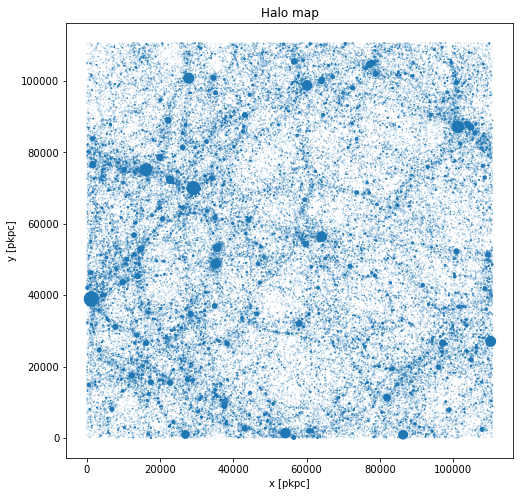

In [3]:
groupsdf = pd.DataFrame()
groupsdf["GroupPosX"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,0] * a/h
groupsdf["GroupPosY"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,1] * a/h
groupsdf["GroupPosZ"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,2] * a/h
groupsdf["GroupMass"] = f["Groups/{}/Group/GroupMass".format(snapshot)][:] * 1e10/h
plt.figure(figsize=(8, 8))
plt.scatter(groupsdf["GroupPosX"] ,groupsdf["GroupPosY"] , s=groupsdf["GroupMass"] /np.max(groupsdf["GroupMass"])*200)
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map")
plt.show()

In [4]:
mass_max = np.max(groupsdf["GroupMass"])
mass_min = np.min(groupsdf["GroupMass"])
print("The maximal mass of the subhalos is "+str(format(mass_max, ".2E"))+" M_sun")
print("The minimal mass of the subhalos is "+str(format(mass_min, ".2E"))+" M_sun")
print("In the following we set different minimum cuts and plot the maps.")

The maximal mass of the subhalos is 6.19E+14 M_sun
The minimal mass of the subhalos is 1.81E+10 M_sun
In the following we set different minimum cuts and plot the maps.


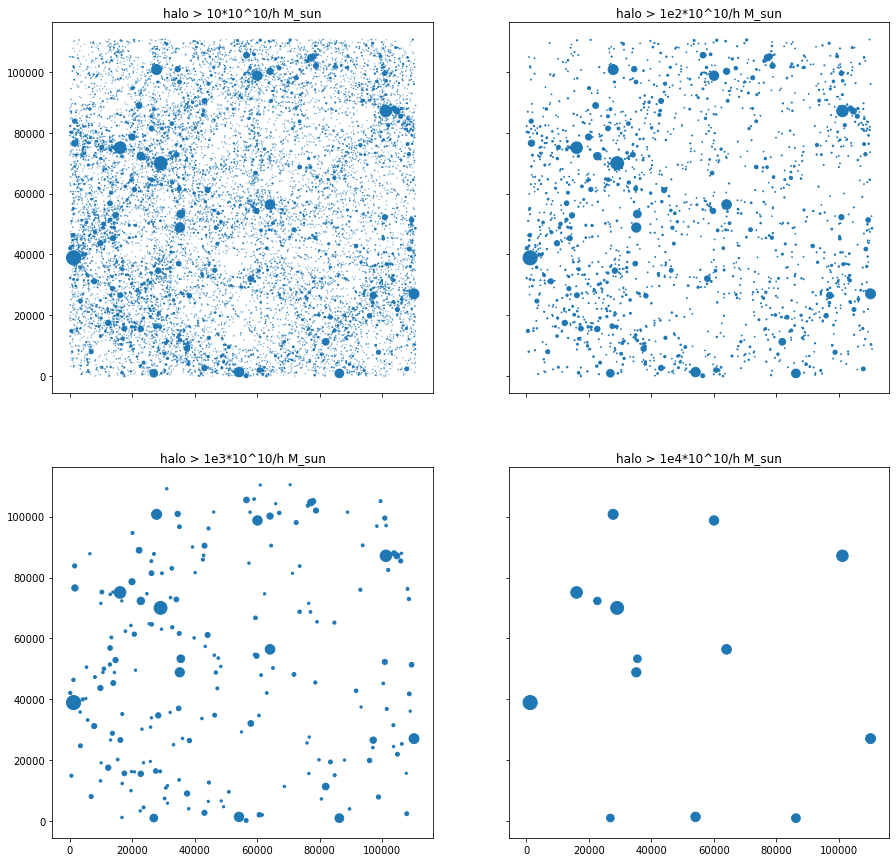

In [5]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(15, 15))
mass_limit = 10 * 1e10/h
axs[0, 0].scatter(groupsdf["GroupPosX"][(groupsdf["GroupMass"] > mass_limit)] ,groupsdf["GroupPosY"][(groupsdf["GroupMass"] > mass_limit)] , s=groupsdf["GroupMass"][(groupsdf["GroupMass"] > mass_limit)] /mass_max*200)
mass_limit = 1e2 * 1e10/h
axs[0, 1].scatter(groupsdf["GroupPosX"][(groupsdf["GroupMass"] > mass_limit)] ,groupsdf["GroupPosY"][(groupsdf["GroupMass"] > mass_limit)] , s=groupsdf["GroupMass"][(groupsdf["GroupMass"] > mass_limit)] /mass_max*200)
mass_limit = 1e3 * 1e10/h
axs[1, 0].scatter(groupsdf["GroupPosX"][(groupsdf["GroupMass"] > mass_limit)] ,groupsdf["GroupPosY"][(groupsdf["GroupMass"] > mass_limit)] , s=groupsdf["GroupMass"][(groupsdf["GroupMass"] > mass_limit)] /mass_max*200)
mass_limit = 1e4 * 1e10/h
axs[1, 1].scatter(groupsdf["GroupPosX"][(groupsdf["GroupMass"] > mass_limit)] ,groupsdf["GroupPosY"][(groupsdf["GroupMass"] > mass_limit)] , s=groupsdf["GroupMass"][(groupsdf["GroupMass"] > mass_limit)] /mass_max*200)
axs[0, 0].set_title('halo > 10*10^10/h M_sun')
axs[0, 1].set_title('halo > 1e2*10^10/h M_sun')
axs[1, 0].set_title('halo > 1e3*10^10/h M_sun')
axs[1, 1].set_title('halo > 1e4*10^10/h M_sun')
plt.show()

### Discussion

From above plots we can see that the DM distribution clearly shows structure. While at some place the haloes have huge mass, some other places are "isolated", when observing for a small  scale.

### Plot the DM particles along a random orientation

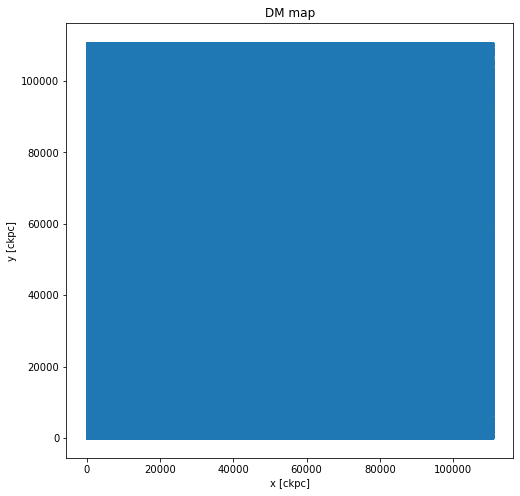

In [6]:
dmdf = pd.DataFrame()
dmdf["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshot)][:,0] * a/h
dmdf["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshot)][:,1] * a/h
dmdf["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshot)][:,2] * a/h
plt.figure(figsize=(8, 8))
plt.scatter(dmdf["DMPosX"] ,dmdf["DMPosY"] , s=0.5)
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("DM map")
plt.show()

From the above plot of dark matter we see no structure, because there's too many particles and all projected on a 2d plane (here projected along z-axis) makes them indistinguishable. Thus in the following we plot the 2D histogram to see a structure. 

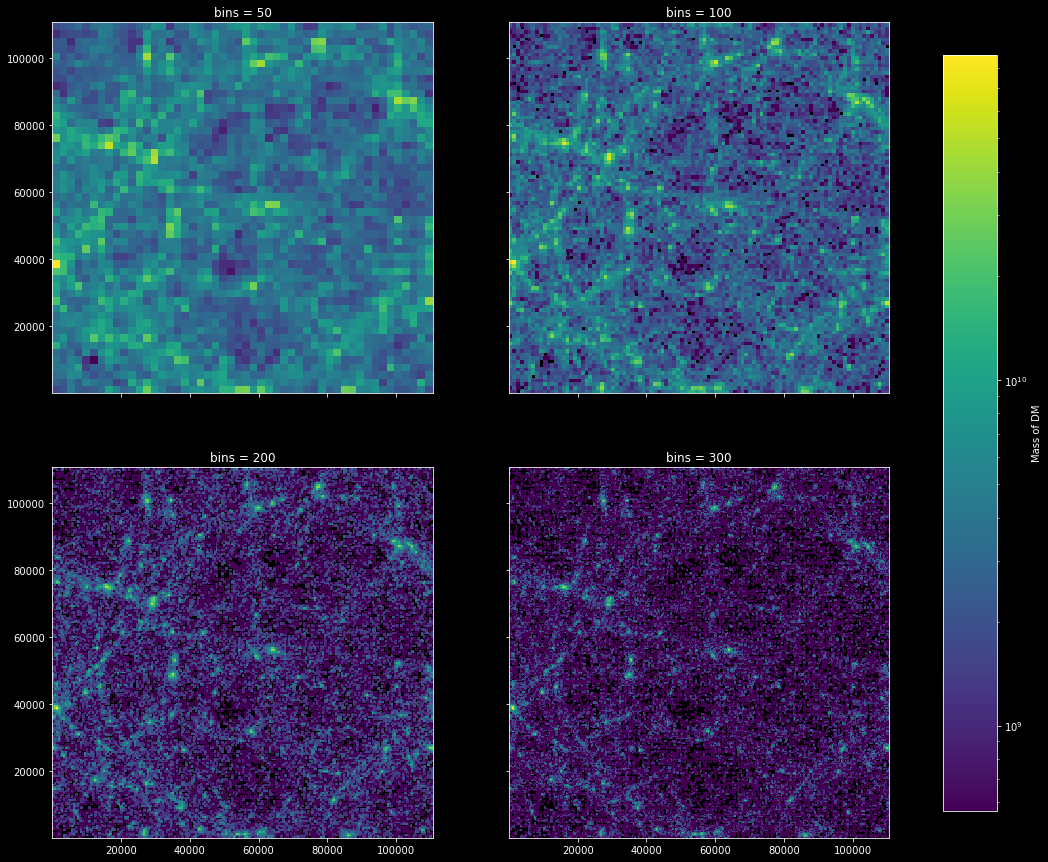

In [31]:
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(15, 15))#, facecolor='black')
axs[0, 0].hist2d(dmdf["DMPosX"][::1000], dmdf["DMPosY"][::1000], bins = 50, weights = mass_dm*np.ones(len(dmdf["DMPosY"][::1000])), norm = clr.LogNorm())
axs[0, 1].hist2d(dmdf["DMPosX"][::1000], dmdf["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf["DMPosY"][::1000])), norm = clr.LogNorm())
axs[1, 0].hist2d(dmdf["DMPosX"][::1000], dmdf["DMPosY"][::1000], bins = 200, weights = mass_dm*np.ones(len(dmdf["DMPosY"][::1000])), norm = clr.LogNorm())
h = axs[1, 1].hist2d(dmdf["DMPosX"][::1000], dmdf["DMPosY"][::1000], bins = 300, weights = mass_dm*np.ones(len(dmdf["DMPosY"][::1000])), norm = clr.LogNorm())
axs[0, 0].set_title('bins = 50')
axs[0, 1].set_title('bins = 100')
axs[1, 0].set_title('bins = 200')
axs[1, 1].set_title('bins = 300')
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
cbar = fig.colorbar(h[3], cax=cbar_ax)
cbar.set_label('Mass of DM')
plt.show()

The above plots show histograms with different bin sizes. One sees that plots for bins between 100 and 200 show clear detailed structure and could be considered as optimal. 

The densities we are looking at are around 7*10^9 M_sun/Mpc^2 (bluegreen). 

The density field shows structure.

### Now we compare differnt times.

In [13]:
snapshots = [2, 17, 33]
dmdf2 = pd.DataFrame()
dmdf2["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[0])][:,0] * a/h
dmdf2["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[0])][:,1] * a/h
dmdf2["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[0])][:,2] * a/h
dmdf17 = pd.DataFrame()
dmdf17["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[1])][:,0] * a/h
dmdf17["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[1])][:,1] * a/h
dmdf17["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[1])][:,2] * a/h
dmdf33 = pd.DataFrame()
dmdf33["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[2])][:,0] * a/h
dmdf33["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[2])][:,1] * a/h
dmdf33["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[2])][:,2] * a/h

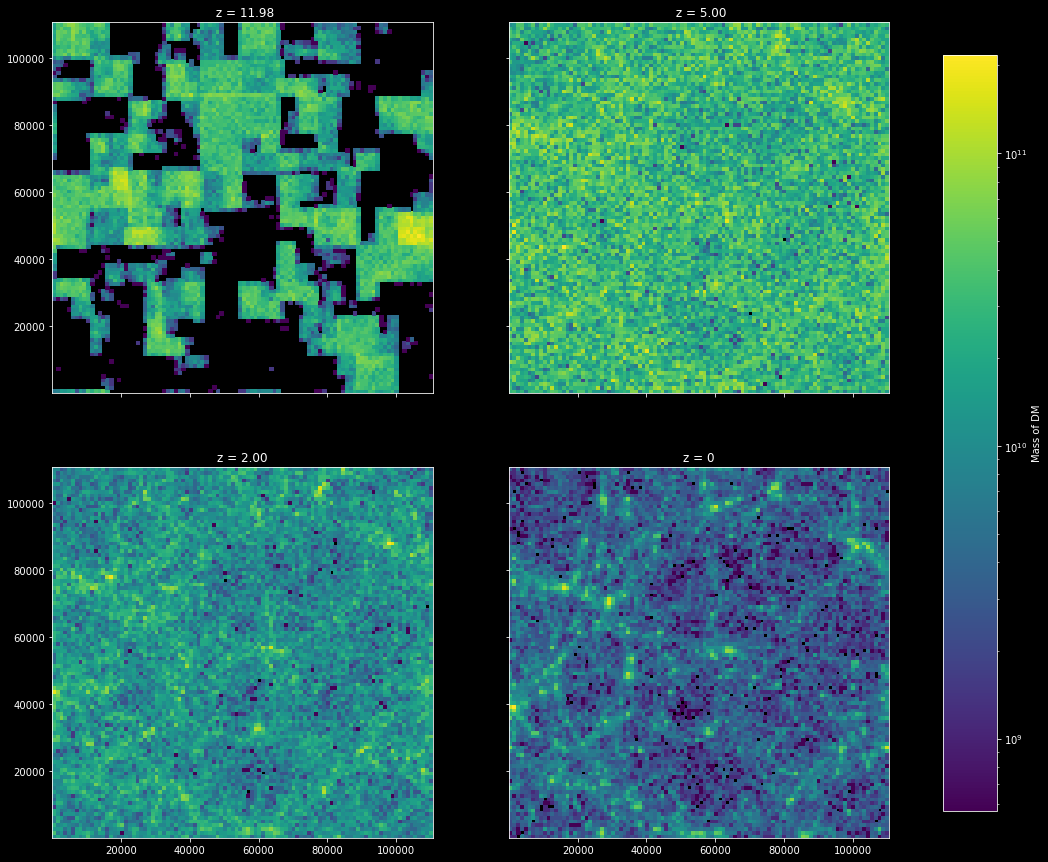

In [32]:
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(15, 15))#, facecolor='black')
axs[0, 0].hist2d(dmdf2["DMPosX"][::1000], dmdf2["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf2["DMPosY"][::1000])), norm = clr.LogNorm())
axs[0, 1].hist2d(dmdf17["DMPosX"][::1000], dmdf17["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf2["DMPosY"][::1000])), norm = clr.LogNorm())
axs[1, 0].hist2d(dmdf33["DMPosX"][::1000], dmdf33["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf2["DMPosY"][::1000])), norm = clr.LogNorm())
h = axs[1, 1].hist2d(dmdf["DMPosX"][::1000], dmdf["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf2["DMPosY"][::1000])), norm = clr.LogNorm())
axs[0, 0].set_title(' z = 11.98')
axs[0, 1].set_title(' z = 5.00')
axs[1, 0].set_title('z = 2.00')
axs[1, 1].set_title('z = 0')
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
cbar = fig.colorbar(h[3], cax=cbar_ax)
cbar.set_label('Mass of DM')
plt.show()

We plotted DM particles at z = 11.98, z = 5.00, and z = 2.00. Comparing them (plus the above one with z = 0) we see that with time forwarding the perturbations in the homogeneous random field accumulate matter around themselves and large structure forms. 

## Check what is wrong with the data at z = 11.98

To check what is wrong with the datasets, we plot the data read directly from the snapshots files instead of simulation.hdf5.

(94196375,)
(94196375,)


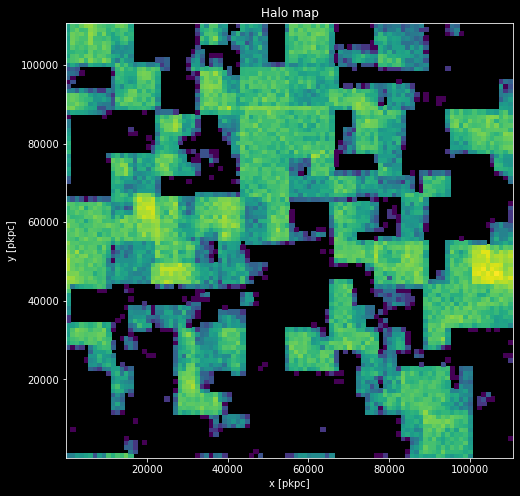

In [35]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_002/snap_002.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_002/snap_002.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_002/snap_002.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_002/snap_002.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map")
plt.show()

### Check other snapshots datasets

since snapshot_002 shows strange lack of data.

In [36]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_000/snap_000.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_000/snap_000.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_000/snap_000.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_000/snap_000.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])+), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_000")
plt.show()

OSError: Unable to open file (unable to open file: name = '/u/yali/cosmology/output/snapdir_000/snap_000.0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

(94196375,)
(94196375,)


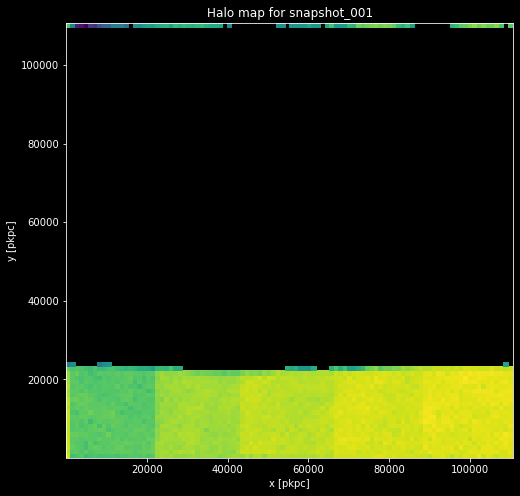

In [20]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_001/snap_001.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_001/snap_001.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_001/snap_001.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_001/snap_001.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_001")
plt.show()

(94196375,)
(94196375,)


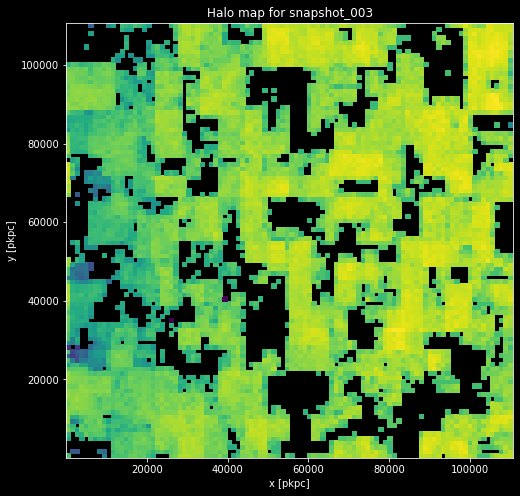

In [23]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_003/snap_003.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_003/snap_003.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_003/snap_003.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_003/snap_003.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_003")
plt.show()

(94196375,)
(94196375,)


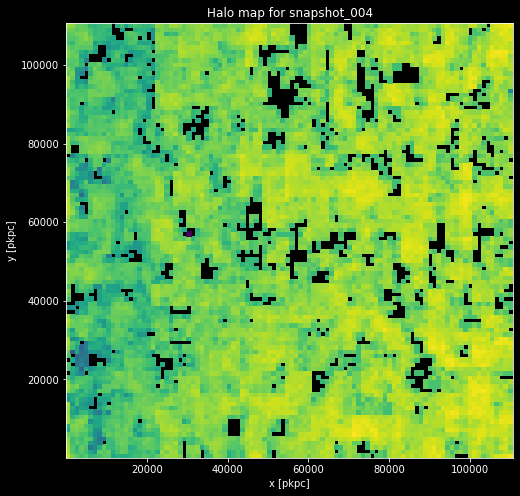

In [24]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_004/snap_004.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_004/snap_004.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_004/snap_004.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_004/snap_004.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_004")
plt.show()

(94196375,)
(94196375,)


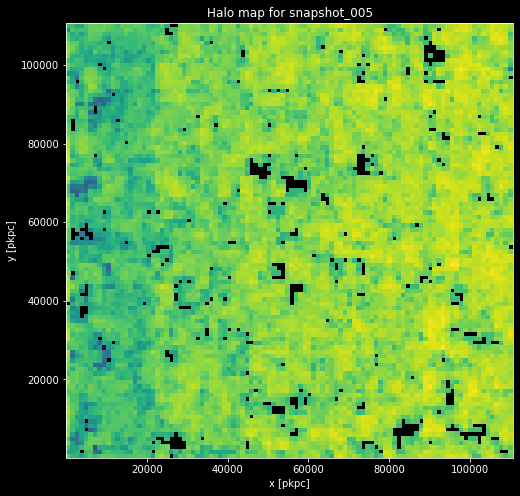

In [26]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_005/snap_005.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_005/snap_005.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_005/snap_005.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_005/snap_005.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_005")
plt.show()

(94196375,)
(94196375,)


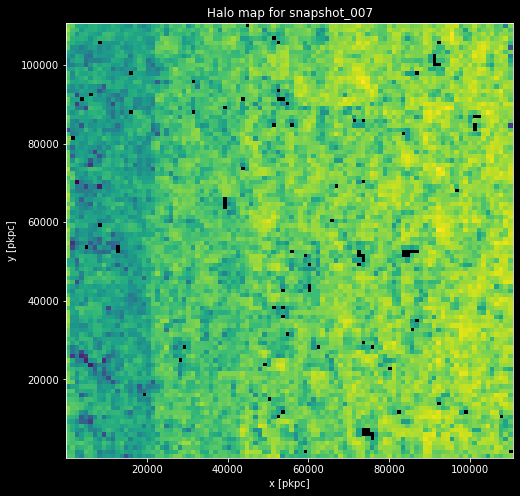

In [30]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_007/snap_007.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_007/snap_007.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_007/snap_007.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_007/snap_007.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_007")
plt.show()

(94196375,)
(94196375,)


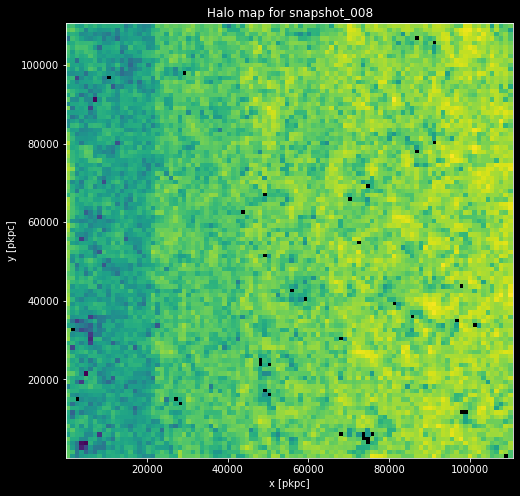

In [29]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_008/snap_008.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_008/snap_008.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_008/snap_008.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_008/snap_008.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_008")
plt.show()

(94196375,)
(94196375,)


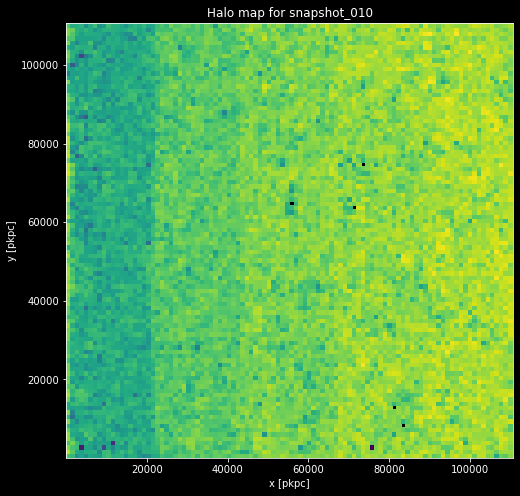

In [28]:
f0 = h5py.File("/u/yali/cosmology/output/snapdir_010/snap_010.0.hdf5", 'r')
x0 = f0["PartType1"]["Coordinates"][:,0] * a/h
y0 = f0["PartType1"]["Coordinates"][:,1] * a/h
f1 = h5py.File("/u/yali/cosmology/output/snapdir_010/snap_010.1.hdf5", 'r')
x1 = f1["PartType1"]["Coordinates"][:,0] * a/h
y1 = f1["PartType1"]["Coordinates"][:,1] * a/h
f2 = h5py.File("/u/yali/cosmology/output/snapdir_010/snap_010.2.hdf5", 'r')
x2 = f2["PartType1"]["Coordinates"][:,0] * a/h
y2 = f2["PartType1"]["Coordinates"][:,1] * a/h
f3 = h5py.File("/u/yali/cosmology/output/snapdir_010/snap_010.3.hdf5", 'r')
x3 = f3["PartType1"]["Coordinates"][:,0] * a/h
y3 = f3["PartType1"]["Coordinates"][:,1] * a/h
args = (x0, x1, x2, x3)
x = np.concatenate(args)
args = (y0, y1, y2, y3)
y = np.concatenate(args)
print(x.shape)
print(y.shape)
plt.figure(figsize=(8, 8))
plt.hist2d(x[::1000] ,y[::1000], bins = 100, weights = mass_dm*np.ones(len(x[::1000])), norm = clr.LogNorm())
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map for snapshot_010")
plt.show()